# Examen Final

## Métodos Computacionales 2

El examen es **individual** incluyendo la no colaboración entre compañeros de grupo. 

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombre_ExamenFinal.ipynb, con su primer Apellido y Nombre. **El archivo debe poder correr en el binder del curso**. 

Si un numeral del ejercicio se demora **más de 10 segundos** en correr se considerará **incorrecto**.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Viernes 26 de Mayo 2:30 pm**

## Librerias

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problema 1

Considere el siguiente conjunto de datos que corresponde a la magnitud de un temblor en la escala de Ricther, tomado en un tiempo de 1 día.

Estos datos fueron tomados de "Earthquake harzard Program", https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php.

A continuación se realiza un gráfico de la magnitud del temblor en la escala de Ricther.

Text(0.5, 0, 'time')

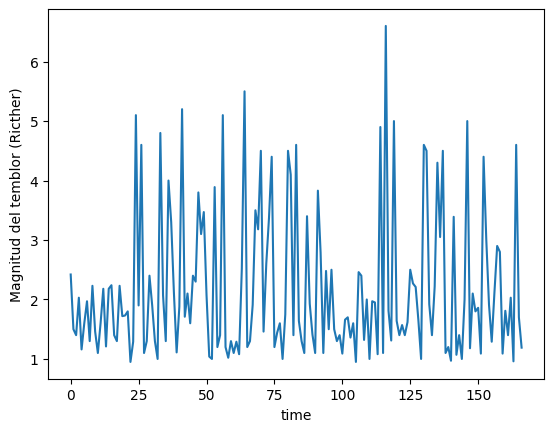

In [14]:
## lectura del archivo del temblor (no modificar)
earth_quake_data = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/1.0_day.csv")
magnitude = earth_quake_data["mag"].to_numpy()

plt.plot(np.arange(len(magnitude)), magnitude)
plt.ylabel("Magnitud del temblor (Ricther)")
plt.xlabel("time")

a) Realice un gráfico del espacio de frecuencias del temblor. Usando **plt.stem()**

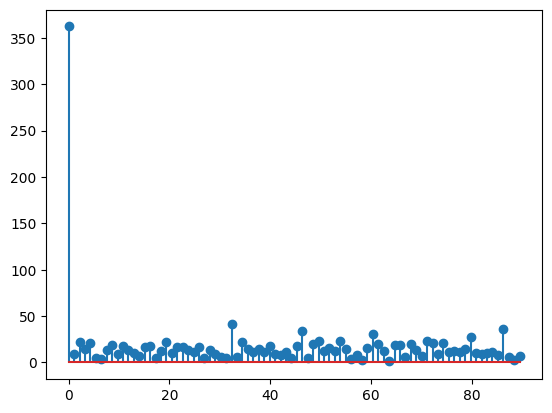

In [21]:
## Su codigo aqui

magnitudes = np.fft.fft(magnitude)
freqs = np.fft.fftfreq(len(magnitude))
freqs *= 180
magnitudes = np.abs(magnitudes)

fig, ax = plt.subplots()
ax.stem(freqs[freqs >= 0], magnitudes[freqs >= 0])
plt.show()

b) Incluya en el gráfico anterior las 10 frecuencias más importantes del temblor usando **plt.stem()** con otro color. Es decir gráfique las amplitudes de las 10 frecuencias más importantes que describen el temblor de un color y las otras frecuencias de otro color.

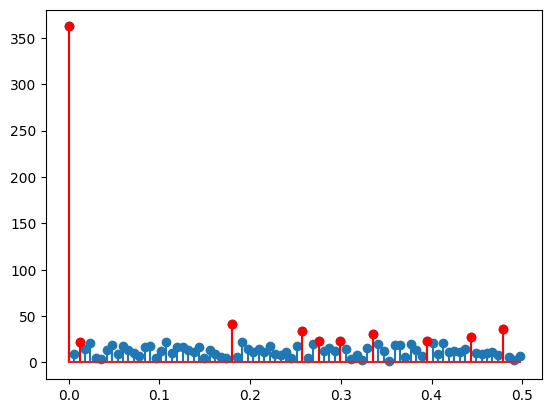

In [16]:
# su codigo aqui

freqs_positivas = freqs[freqs >= 0]
magnitudes_positivas = np.abs(magnitudes[freqs >= 0])
indices_mayores = np.argsort(magnitudes_positivas)[::-1][:10] # índices de las mayores


fig, ax = plt.subplots()
ax.stem(freqs_positivas, magnitudes_positivas)
ax.stem(freqs_positivas[indices_mayores], magnitudes_positivas[indices_mayores], linefmt='r-', markerfmt='ro')
plt.show()

## Problema 2

Considere la ecuación de un sistema masa resorte con fricción del aire y forzado,

$$
m\frac{d^2{x}}{d^2t}+b\frac{d{x}}{dt}+kx = F_0\cos{\omega_0t},
$$

a) Resuelva la ecuación del resorte forzado con el método de Runge Kutta 4to orden usando los siguientes parametros $m = 1 \text{kg}$ , $b = 2 \text{ Ns/m }$ , $k = 26 \text{ N/m }$ , $F_0 = 82 \text{ N } $ , $\omega_0 = 4 \text{ rad/s }$. Genere un gráfico de $x$ en función del tiempo desde $t=0$ s hasta $t=10$ s y $dt = 0.025 \text{s}$. Las condiciones iniciales son $x_0 = -20 \text{ m}$ y $v_0 = 0$.

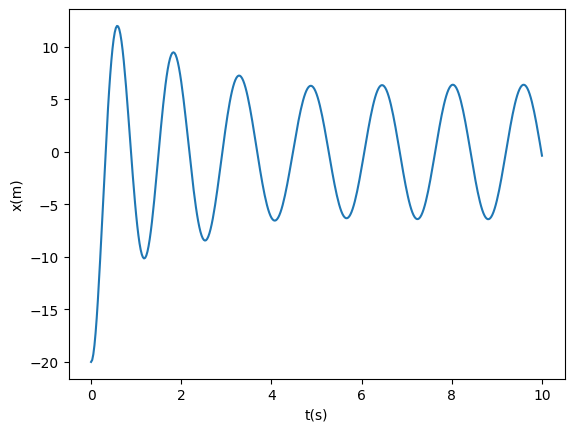

In [17]:
### su codigo aqui

# parámetros
m = 1 # kg 
b = 2 # Ns/m
k = 26 # N/m
F0 = 82 # N
omega0 = 4 # rad/s

# conds iniciales
x0 = -20 
v0 = 0 

# Rango de tiempo
t0 = 0
tf = 10
dt = 0.025


def runge_kutta_cuarto_orden_segundo_grado(f, t0, tf, h, x0, v0):
  vs = [v0]
  xs = [x0]
  
  for t in np.arange(t0, tf, h):

    l1 = h * f(x0, v0, t)
    k1 = h * v0

    l2 = h * f(x0 + k1/2, v0 + l1/2, t + h/2)
    k2 = h * (v0 + l1/2)

    l3 = h * f(x0 + k2/2, v0 + l2/2, t + h/2)
    k3 = h * (v0 + l2/2)

    l4 = h * f(x0 + k3, v0 + l3, t + h)
    k4 = h * (v0 + l3)

    v1 = v0 + (l1 + 2*l2 + 2*l3 + l4)/6 
    vs.append(v1)
    v0 = v1

    x1 = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    xs.append(x1)
    x0 = x1

  return np.linspace(t0,tf,len(vs)), np.array(vs), np.array(xs)

def f(x, v, t):
  return F0*np.cos(omega0*t) - k*x - b*v


t, v_rk4, x_rk4 = runge_kutta_cuarto_orden_segundo_grado(f, t0, tf, dt, x0, v0) # h = dt

fig, ax = plt.subplots()
ax.plot(t, x_rk4)
plt.xlabel('t(s)')
plt.ylabel('x(m)')
plt.show()


b) Se puede notar del gráfico anterior, que la amplitud $C$ del resorte se vuelve constante despues de un cierto tiempo, haciendo que el movimiento se parezca a una oscilación de resorte masa convencional. Con el método numerico de Runge-Kutta anterior, cálcule númericamente $C(\omega_0)$, es decir halle la amplitud estacionaria del movimiento en función de $\omega_0$, varié $\omega_0$ entre $0$ y $20 \text{rad /s}$ con 100 puntos o en otros términos con $d\omega = 0.2 \text{ rad/s}$. Realicé el gráfico de $C$ vs $\omega_0$.

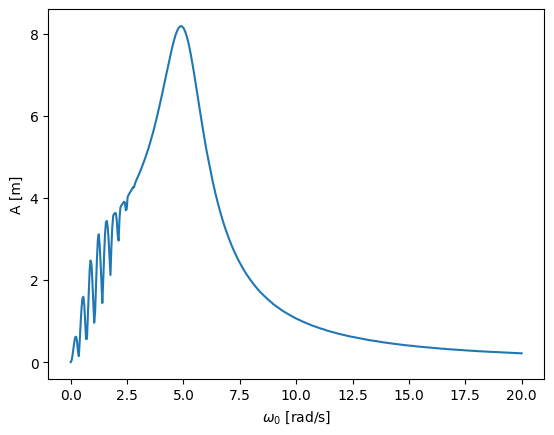

In [18]:
# su codigo aqui

N_omegas = 100 # el valor del enunicado
N_omegas = 500 # tomé más para suavizar la gráfica
omegas = np.linspace(0, 20, N_omegas)
As = np.zeros_like(omegas)

for i, omega in enumerate(omegas):
  omega0 = omega
  t, v_rk4, x_rk4 = runge_kutta_cuarto_orden_segundo_grado(f, t0, tf, dt, x0, v0) # h = dt
  lx = int (len(x_rk4) * 0.2)
  maximo = max(x_rk4[-lx:])
  minimo = min(x_rk4[-lx:])
  #print(f"i = {i}, max = {maximo}, min = {minimo}")
  #C = maximo
  C = (np.abs(maximo - minimo))/2
  As[i] = C


fig, ax = plt.subplots()
ax.plot(omegas, As)
plt.xlabel('$\omega_0$ [rad/s]')
plt.ylabel('A [m]')
plt.show()

c) Qué puede decir de la frecuencia que obtiene mayor amplitud?

Su texto aqui

En un sistema de oscilación forzada, la frecuencia que obtiene la mayor amplitud es conocida como la frecuencia de resonancia. Esta es la frecuencia a la cual el sistema oscila con mayor amplitud. Lo anterior ocurre cuando la frecuencia de forzamiento coincide con la frecuencia natural  de oscilación del sistema.

In [19]:
freq_resonancia = omegas[np.argmax(As)]
print(f"La frecuencia de resonancia del sistema es {round(freq_resonancia,2)} rad/s")

La frecuencia de resonancia del sistema es 4.89 rad/s
